In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Loading the Dataset

In [2]:

parent_directory = './dataset\HAM10000_images_part_1'


# Use glob to get all image file paths in all subdirectories
imgPath = glob.glob(os.path.join(parent_directory, '**', '*.jpg'), recursive=True)  # You can adjust the file type


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\1814168735.py:1: SyntaxWarning: invalid escape sequence '\H'
  parent_directory = './dataset\HAM10000_images_part_1'


## Feature Extraction

In [3]:
import cv2
import numpy as np

# Load the capacitance image
def hydration_values(img):
    image = cv2.imread(img, 0)  # Load as grayscale

# Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Normalize the image for better contrast
    norm_image = cv2.normalize(blurred_image, None, 0, 255, cv2.NORM_MINMAX)

# Apply thresholding to separate hydrated vs non-hydrated areas
    _, threshold_image = cv2.threshold(norm_image, 128, 255, cv2.THRESH_BINARY)

# Calculate the moisture distribution by analyzing pixel intensities
    hydrated_area = np.sum(threshold_image == 255)
    non_hydrated_area = np.sum(threshold_image == 0)
    total_area = hydrated_area + non_hydrated_area

# Output moisture content as percentage
    
    hydration_level = (hydrated_area / total_area) * 100
    return hydration_level 


hydration = []


for img in imgPath :
    hydration.append(hydration_values(img))



In [4]:
import pandas as pd 

df  =pd.DataFrame(hydration)


In [5]:
test = [] 
for i in imgPath:
    test.append(i.replace('./dataset\\HAM10000_images_part_1\\',""))
    

In [6]:
df['image_name'] = test
df= df.set_index('image_name')
df.columns = ['hydration']

In [7]:
df.to_csv('Cap1.csv')

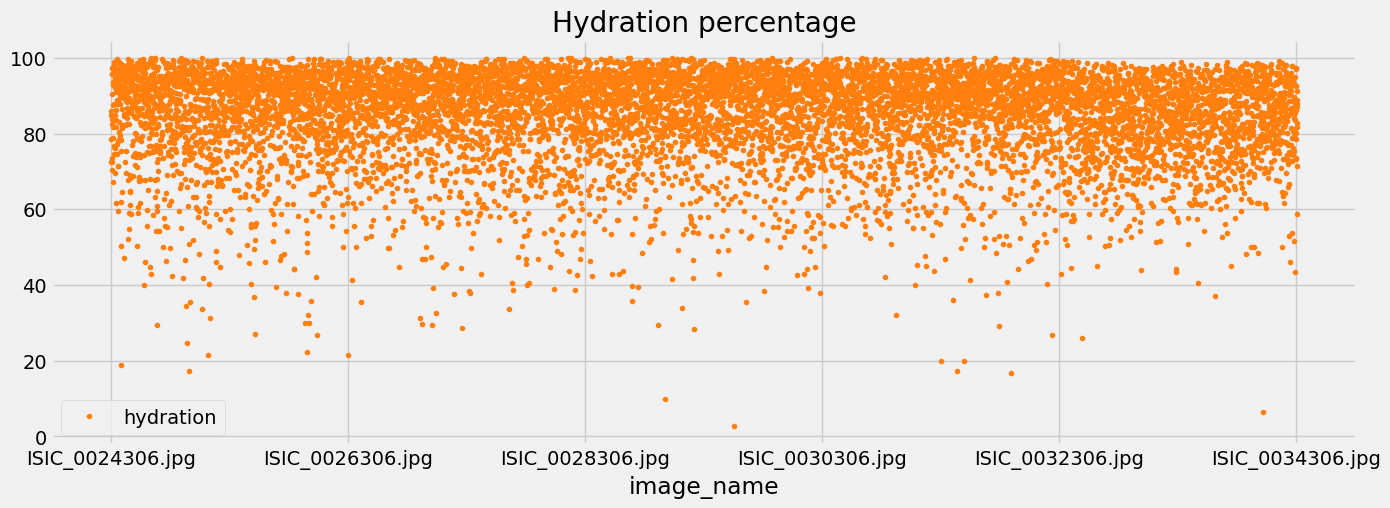

In [21]:
df.plot(
    style='.',
    figsize=(15,5),
    color =color_pal[1],
    title='Hydration percentage'
)
plt.show()

<Axes: ylabel='Frequency'>

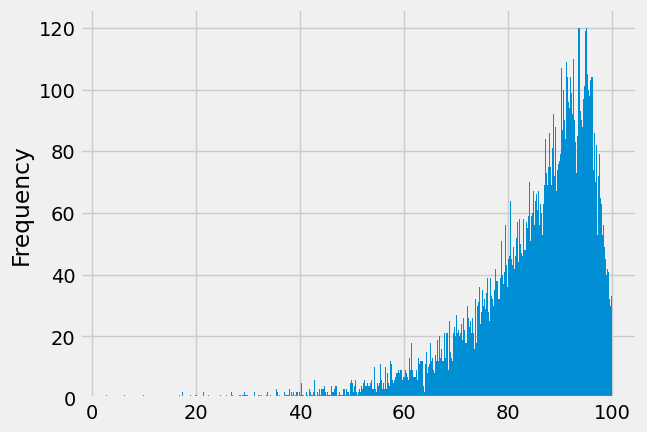

In [9]:
df['hydration'].plot(kind='hist',bins =500)

## Using Heat Map

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\1122573205.py:6: SyntaxWarning: invalid escape sequence '\M'
  img = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)


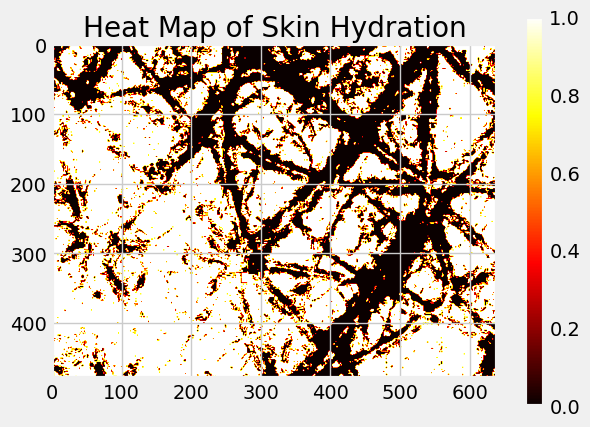

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale (or color if you prefer)
img = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)

# Normalize pixel values to range [0, 1]
img_normalized = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)

# Display the image as a heatmap
plt.imshow(img_normalized, cmap='hot')
plt.colorbar()
plt.title('Heat Map of Skin Hydration')
plt.show()


Mean Intensity: 0.6382389322916666
Standard Deviation: 0.4805101430759397


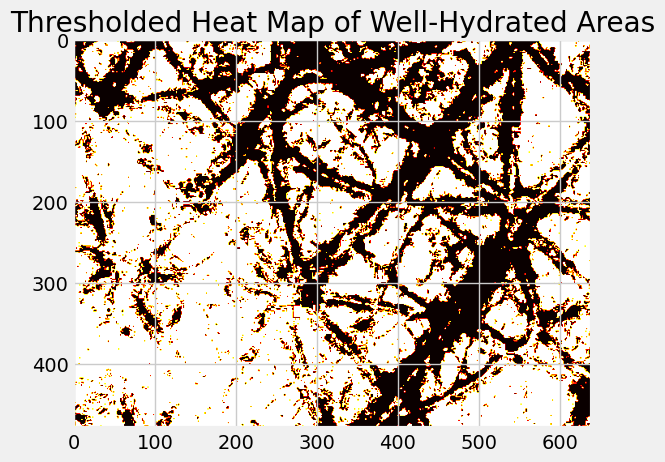

In [16]:
# Calculate mean and standard deviation of pixel intensities
mean_intensity = np.mean(img_normalized)
std_intensity = np.std(img_normalized)

print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_intensity}")
# Apply thresholding to identify well-hydrated areas
_, thresholded = cv2.threshold(img_normalized, 0.6, 1, cv2.THRESH_BINARY)

# Show thresholded areas as heatmap
plt.imshow(thresholded, cmap='hot')
plt.title('Thresholded Heat Map of Well-Hydrated Areas')
plt.show()


## Capacitance

<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\2680337733.py:5: SyntaxWarning: invalid escape sequence '\M'
  image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)  # Load as grayscale


Hydration level: 34.72%


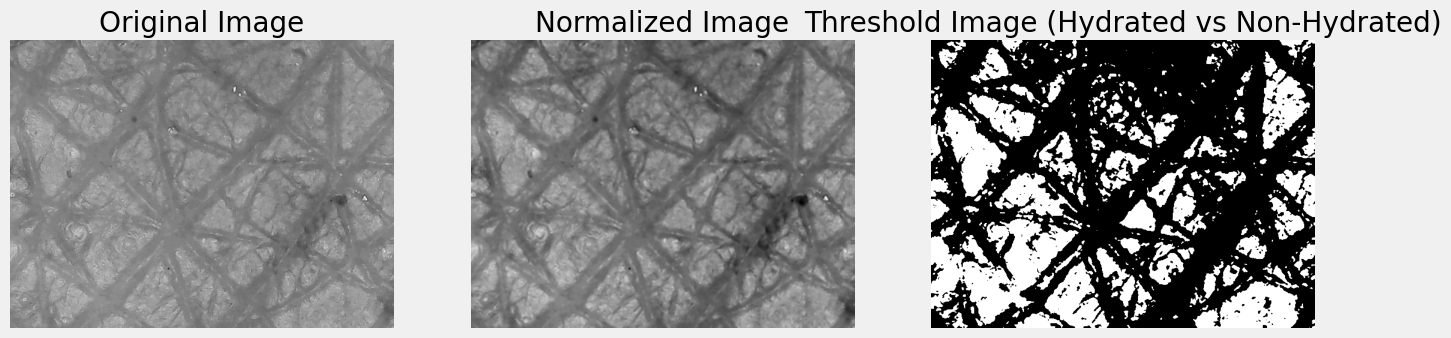

In [11]:
import cv2
import numpy as np

# Load the capacitance image
image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)  # Load as grayscale

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Normalize the image for better contrast
norm_image = cv2.normalize(blurred_image, None, 0, 255, cv2.NORM_MINMAX)

# Apply thresholding to separate hydrated vs non-hydrated areas
_, threshold_image = cv2.threshold(norm_image, 128, 255, cv2.THRESH_BINARY)

# Calculate the moisture distribution by analyzing pixel intensities
hydrated_area = np.sum(threshold_image == 255)
non_hydrated_area = np.sum(threshold_image == 0)
total_area = hydrated_area + non_hydrated_area

# Output moisture content as percentage
hydration_level = (hydrated_area / total_area) * 100
print(f'Hydration level: {hydration_level:.2f}%')
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Show original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show normalized image
ax[1].imshow(norm_image, cmap='gray')
ax[1].set_title('Normalized Image')
ax[1].axis('off')

# Show thresholded image
ax[2].imshow(threshold_image, cmap='gray')
ax[2].set_title('Threshold Image (Hydrated vs Non-Hydrated)')
ax[2].axis('off')

plt.show()

## OCT METHOD

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\1987420380.py:6: SyntaxWarning: invalid escape sequence '\M'
  image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)  # Load as grayscale


Stratum corneum thickness: 7 pixels


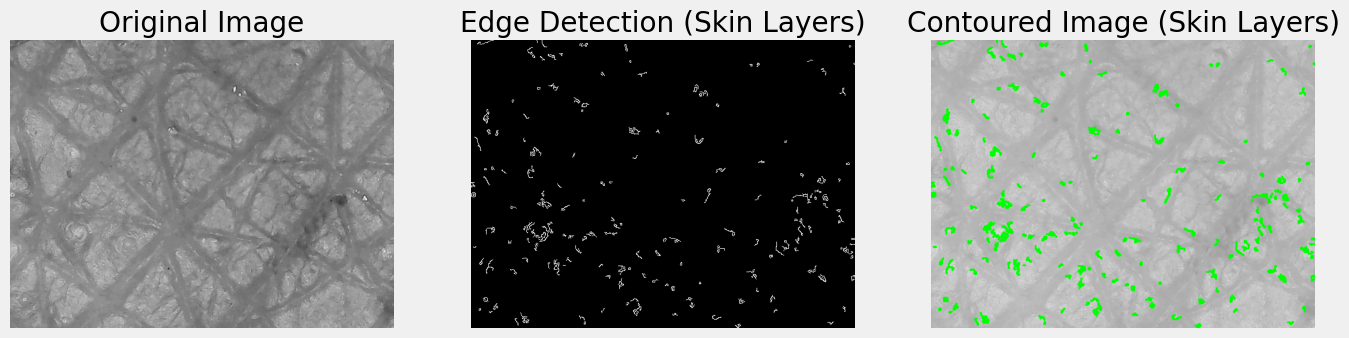

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the OCT image
image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', 0)  # Load as grayscale

# Apply edge detection to find skin layers
edges = cv2.Canny(image, 50, 150)

# Find contours to isolate the stratum corneum layer
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image to visualize layers
contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

# Assuming the first contour represents the stratum corneum
# Calculate the thickness of the stratum corneum
if len(contours) > 0:
    x, y, w, h = cv2.boundingRect(contours[0])
    print(f'Stratum corneum thickness: {h} pixels')

# Display the original, edge-detected, and contoured images using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Show original image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show edge detection result
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edge Detection (Skin Layers)')
ax[1].axis('off')

# Show contoured image
ax[2].imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Contoured Image (Skin Layers)')
ax[2].axis('off')

plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\2969616891.py:2: SyntaxWarning: invalid escape sequence '\M'
  gray_image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', cv2.IMREAD_GRAYSCALE)


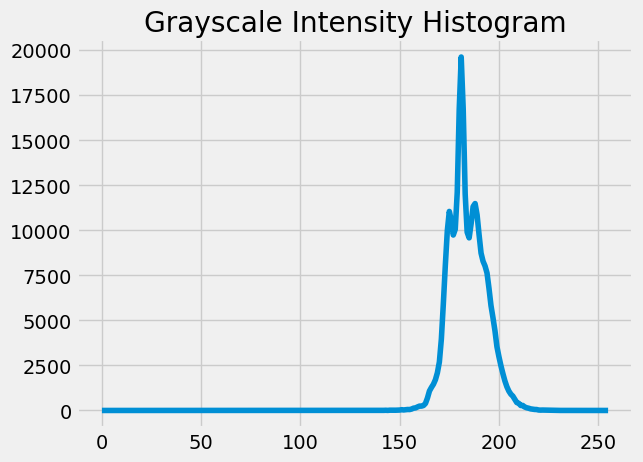

In [13]:
# Convert image to grayscale and analyze histogram (for depth and density simulation)
gray_image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Plot histogram to simulate depth and intensity analysis
import matplotlib.pyplot as plt
plt.plot(hist)
plt.title('Grayscale Intensity Histogram')
plt.show()


##  Reflectance-Based Hydration Detection (Optical Imaging)

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arham\AppData\Local\Temp\ipykernel_10540\3006848119.py:6: SyntaxWarning: invalid escape sequence '\M'
  image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg')


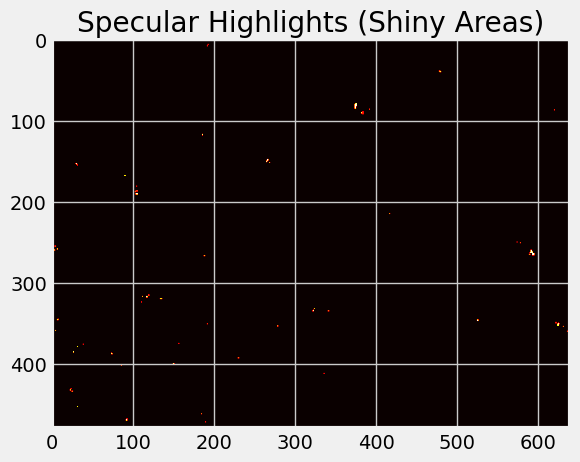

Proportion of shiny areas (likely hydrated): 0.05%


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Volunteers Data\MADAM REHANA\hand (after 35 days).jpg')

# Convert to grayscale for simplicity
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding to detect high-intensity areas (shiny parts)
_, shiny_areas = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)

# Display the shiny areas
plt.imshow(shiny_areas, cmap='hot')
plt.title('Specular Highlights (Shiny Areas)')
plt.show()

# Measure the proportion of shiny areas
shiny_proportion = np.sum(shiny_areas == 255) / shiny_areas.size
print(f"Proportion of shiny areas (likely hydrated): {shiny_proportion:.2%}")
